# Kaggle Dataset on Indian Housing Prices, Predictive Analysis

In [378]:
#Importing Dependencies
import pandas as pd
import seaborn as sns
import numpy as np

In [379]:
data=pd.read_csv(r'C:\Users\HP\Downloads\BHP.csv')

In [380]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [381]:
data.drop(columns=['society'],inplace=True)

In [382]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [383]:
data.shape

(13320, 8)

In [384]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [385]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [386]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [387]:
new_dummy_data = []
for value in data['area_type'].values:
    if value == 'Super built-up  Area':
        new_dummy_data.append(1)
    elif value == 'Built-up  Area':
        new_dummy_data.append(2)
    elif value == 'Plot  Area':
        new_dummy_data.append(3)
    else:
        new_dummy_data.append(4)
        
data['area_type'] = new_dummy_data

In [388]:
data['area_type'].value_counts()

1    8790
2    2418
3    2025
4      87
Name: area_type, dtype: int64

In [389]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [390]:
data['availability'] = data['availability'].apply(lambda x:  1 if  x == 'Ready To Move' else 0)



#ALTERNATIVES:

#dataset['availability'] = dataset['availability'].map({1: 'Ready To Move', 0: ...})

#if you want to use a for loop:

#new_dummy_data = []

#for value in df.y.values:
#    if value == 'Accepted':
#        new_dummy_data.append(1)
#    else:
#        new_dummy_data.append(0)

#df['dummy'] = new_dummy_data


In [391]:
data['availability'].value_counts()

1    10581
0     2739
Name: availability, dtype: int64

In [392]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,3,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,1,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,1,1,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [393]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [394]:
#There are 1305 location and we don't have enough information on how the location affects the price, we just drop the location
data.drop(columns='location',inplace=True)

In [395]:
data.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,1,0,2 BHK,1056,2.0,1.0,39.07
1,3,1,4 Bedroom,2600,5.0,3.0,120.00
2,2,1,3 BHK,1440,2.0,3.0,62.00
3,1,1,3 BHK,1521,3.0,1.0,95.00
4,1,1,2 BHK,1200,2.0,1.0,51.00


In [396]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [397]:
new_dummy_data = []
data['size'] = data['size'].apply(str)
data['size'] = data['size'].replace(np.nan, 0)
for value in data['size'].values:
    if value== 'nan':
        new_dummy_data.append(0)
    if ('1 ' in value) and not('11 ' in value):
        new_dummy_data.append(1)
    if ('2 ' in value) and not('12 ' in value):
        new_dummy_data.append(2)
    if ('3 ' in value) and not('13 ' in value):
        new_dummy_data.append(3)
    if ('4 ' in value) and not('14 ' in value):
        new_dummy_data.append(4)
    if ('5 ' in value) and not('15 ' in value):
        new_dummy_data.append(5)
    if ('6 ' in value) and not('16 ' in value):
        new_dummy_data.append(6)
    if ('7 ' in value) and not('17 ' in value):
        new_dummy_data.append(7)
    if ('8 ' in value) and not('18 ' in value):
        new_dummy_data.append(8)
    if ('9 ' in value) and not('19 ' in value):
        new_dummy_data.append(9)
    if ('10 ' in value):
        new_dummy_data.append(10)
    if ('11 ' in value):
        new_dummy_data.append(11)
    if ('12 ' in value):
        new_dummy_data.append(12)
    if ('13 ' in value):
        new_dummy_data.append(13)
    if ('14 ' in value):
        new_dummy_data.append(14)
    if ('15 ' in value):
        new_dummy_data.append(15)
    if ('16 ' in value):
        new_dummy_data.append(16)
    if ('17 ' in value):
        new_dummy_data.append(17)
    if ('18 ' in value):
        new_dummy_data.append(18)
    if ('19 ' in value):
        new_dummy_data.append(19)
data['size'] = new_dummy_data

In [398]:
data['size'].value_counts()

2     5528
3     4858
4     1417
1      656
5      356
6      221
7      101
8       89
9       54
0       16
10      14
11       4
19       1
16       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

In [399]:
data.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,1,0,2,1056,2.0,1.0,39.07
1,3,1,4,2600,5.0,3.0,120.00
2,2,1,3,1440,2.0,3.0,62.00
3,1,1,3,1521,3.0,1.0,95.00
4,1,1,2,1200,2.0,1.0,51.00


In [400]:
data=data[data['size'] != 0]

In [401]:
data.rename(columns={'size': 'Bedrooms',
                   'area_type': 'Area Type',
                   'availability': 'Availability',
                   'price': 'Price',
                   'total_sqft': 'Area Size (Square Feet)',
                   'bath': 'Bath',
                   'balcony': 'Balcony'}, inplace=True, errors='raise')

In [402]:
data.head()

,Area Type,Availability,Bedrooms,Area Size (Square Feet),Bath,Balcony,Price
0,1,0,2,1056,2.0,1.0,39.07
1,3,1,4,2600,5.0,3.0,120.00
2,2,1,3,1440,2.0,3.0,62.00
3,1,1,3,1521,3.0,1.0,95.00
4,1,1,2,1200,2.0,1.0,51.00


In [403]:
# lets also make sure about the data types
data.dtypes

Area Type                    int64
Availability                 int64
Bedrooms                     int64
Area Size (Square Feet)     object
Bath                       float64
Balcony                    float64
Price                      float64
dtype: object

So, lets fix the Area size data type. After facing several errors when trying to change the Area Size column to numeric values, it seems the the data in the column is TERRIBLY DIRTY! So, let's clean it here! 

In [404]:
data=data[ data[ 'Area Size (Square Feet)' ].str.contains( '-' )==False ]
data=data[ data[ 'Area Size (Square Feet)' ].str.contains( 'q' )==False ]
data=data[ data[ 'Area Size (Square Feet)' ].str.contains( 'e' )==False ]
data=data[ data[ 'Area Size (Square Feet)' ].str.contains( 'a' )==False ]
data=data[ data[ 'Area Size (Square Feet)' ].str.contains( 's' )==False ]
#After cleaning the data, finally the following code works without error! 
data[['Area Size (Square Feet)']] = data[['Area Size (Square Feet)']].apply(pd.to_numeric)



In [405]:
data.describe()

,Area Type,Availability,Bedrooms,Area Size (Square Feet),Bath,Balcony,Price
count,13065.000000,13065.000000,13065.000000,13065.000000,13057.000000,12525.000000,13065.000000
mean,1.506391,0.802449,2.800536,1554.546892,2.691966,1.603912,112.514048
std,0.769407,0.398166,1.227498,1238.422934,1.335985,0.803419,149.662725
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,8.000000
25%,1.000000,1.000000,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,1.000000,1.000000,3.000000,1275.000000,2.000000,2.000000,72.000000
75%,2.000000,1.000000,3.000000,1670.000000,3.000000,2.000000,120.000000
max,4.000000,1.000000,19.000000,52272.000000,40.000000,3.000000,3600.000000


In [406]:
data.isnull().sum()

Area Type                    0
Availability                 0
Bedrooms                     0
Area Size (Square Feet)      0
Bath                         8
Balcony                    540
Price                        0
dtype: int64

In [407]:
data=data[data['Balcony'].notna()] 

In [408]:
data.isnull().sum()

Area Type                  0
Availability               0
Bedrooms                   0
Area Size (Square Feet)    0
Bath                       0
Balcony                    0
Price                      0
dtype: int64

Great, now we do not have any null values! (But we could also replace them with mean or ...)


In [409]:
#Now let us visualize the data to get an idea of how various columns are correlated
#But first:
data.corr()

,Area Type,Availability,Bedrooms,Area Size (Square Feet),Bath,Balcony,Price
Area Type,1.000000,0.137785,0.392778,0.092378,0.336104,-0.140155,0.245717
Availability,0.137785,1.000000,0.099074,0.022511,0.065641,0.091127,0.028703
Bedrooms,0.392778,0.099074,1.000000,0.356606,0.831481,0.206443,0.417793
Area Size (Square Feet),0.092378,0.022511,0.356606,1.000000,0.387790,0.155187,0.556214
Bath,0.336104,0.065641,0.831481,0.387790,1.000000,0.210263,0.457344
Balcony,-0.140155,0.091127,0.206443,0.155187,0.210263,1.000000,0.120875
Price,0.245717,0.028703,0.417793,0.556214,0.457344,0.120875,1.000000


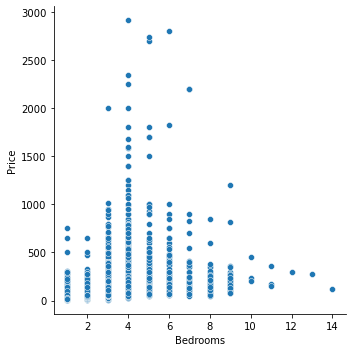

In [256]:
sns.relplot(x='Bedrooms',y='Price',data=data)

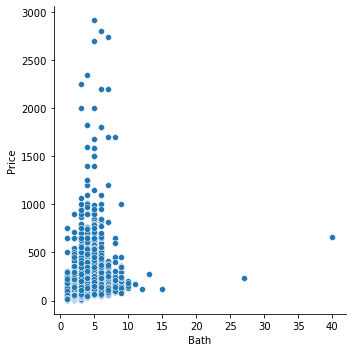

In [258]:
sns.relplot(x='Bath',y='Price',data=data)

There seems to be some outliers here. In order to avoid having the diagrams disturbed too much with the outliers, let us get rid of them right now

In [259]:
data.drop(data[data['Bath'] > 9].index, inplace=True)
data.drop(data[data['Bedrooms'] > 8].index, inplace=True)


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now lets re-plot the plots above

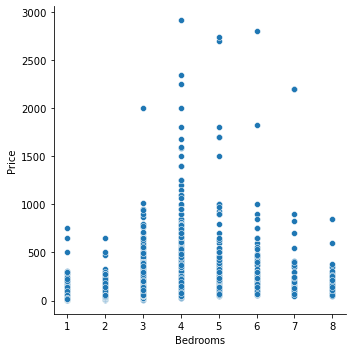

In [262]:
sns.relplot(x='Bedrooms',y='Price',data=data)

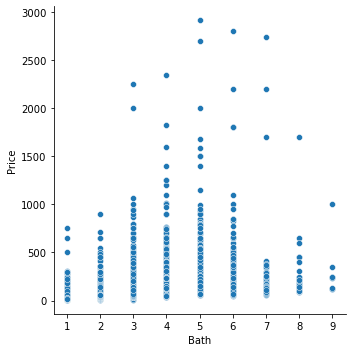

In [263]:
sns.relplot(x='Bath',y='Price',data=data)

It can be observed that for the houses under 4bedrooms and 5 bathrooms, the price of the hourse increases with the number of the Bedrroms/Bathrooms. Now let us check other aspects.

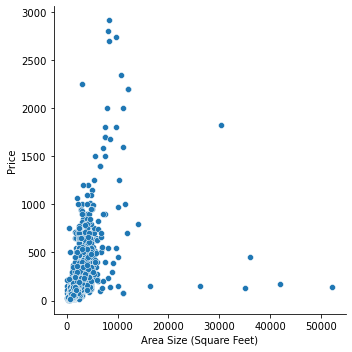

In [410]:
sns.relplot(x='Area Size (Square Feet)',y='Price',data=data)

Well, again, it seems that apart from some outliers (mostly super-big plots), there is some linear relationship here between the Area Size and Price!

In [411]:
# Let us do away with these outliers!
data.drop(data[data['Area Size (Square Feet)'] > 15000].index, inplace=True)

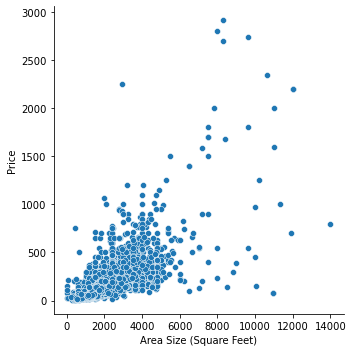

In [412]:
sns.relplot(x='Area Size (Square Feet)',y='Price',data=data)

we can also check for the relation between the price and the number of balconies

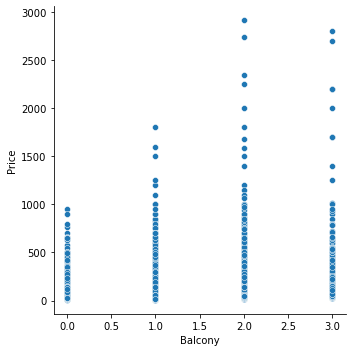

In [413]:
sns.relplot(x='Balcony',y='Price',data=data)

The relation is not very clear. But we can detect that the houses with higher number of balconies tend to experience higher sale prices.

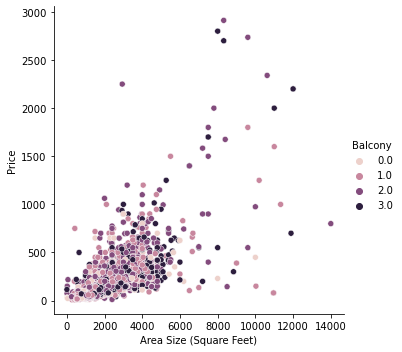

In [414]:
#Let us add the dimension of colors as a representative for number of balconies.
sns.relplot(x='Area Size (Square Feet)',y='Price',data=data,hue='Balcony')

Here, There seems not to be a meaningful relation between the number of balconies and the price, at least, not as visible as the relation with the size

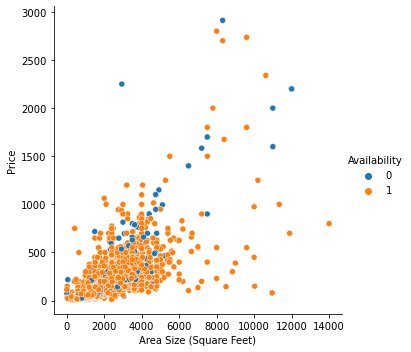

In [416]:
sns.relplot(x='Area Size (Square Feet)',y='Price',data=data,hue='Availability')

Also, there seems that the availability of the house for moving in right away is not much effective in the sales price. So, the buyers are not usually in a rush!

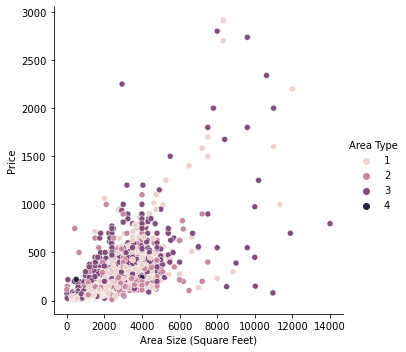

In [421]:
sns.relplot(x='Area Size (Square Feet)',y='Price',data=data,hue='Area Type')

It seems that the area types also do not have a significant impact on the price

#  Price Prediction Based on All Available Factors

Now lets go ahead with the linear regression part.

In [424]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [425]:
train=data.drop(['Availability', 'Price'],axis=1)
test=data['Price']


In [427]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=2)

In [428]:
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [430]:
predict=regr.predict(X_test)
predict

array([109.34449147,  42.4064144 ,  55.39880111, ...,  75.02096743,
        52.85573722, 127.01895392])

In [431]:
regr.score(X_test,y_test)

0.6046565764491366

Not very accurate though..! Question for myself, what can be done to increase this?